# Homework 2

1. Create a database with a least two tables and save your data in it (3 points: 2 points for the code that creates a database and the .db file and 1 point for your commentary about the architecture of the database and why it fits your data)

I will use 2 tables of the results of the KORABLIK standartized language test. One table is for 12 children with SLI (specific language impairment) and the second one is for the controls (typically developing children). Both tables contain scores of 6 battery's subtests:
NC - Nouns comprehension;
VC - Verbs comprehension;
SC - Syntax comprehension;
NR - Nonwords repetition;
NP - Nouns Production;
VP - Verbs Production.

Other than the scores, the tables also provide information on participants' age, sex, the group they belong to, as well as their personal IDs. 
All the scores are in percentage. 

In [1]:
import pandas as pd
import csv
import sqlite3

In [103]:
read_file = pd.read_excel (r'D:\Qmet_project\Python\Controls.xlsx')
Controls_csv = read_file.to_csv (r'D:\Qmet_project\Python\Controls.csv', index = None, header=True)

In [104]:
df_Controls = pd.read_csv('D:\Qmet_project\Python\Controls.csv', sep=',', encoding='utf-8')

In [105]:
df_Controls.head()

,ID,Sex,Age,NC,VC,SC,NR,NP,VP,Groups
0,N840,m,"4,5",88,79,83,63,69,96,Controls
1,N304,m,4,83,96,71,88,56,75,Controls
2,N700,f,4,88,92,88,38,50,58,Controls
3,N403,f,5,88,100,96,88,81,75,Controls
4,N303,m,"4,5",100,75,88,96,88,88,Controls


In [106]:
read_file = pd.read_excel (r'D:\Qmet_project\Python\SLI.xlsx')
SLI_csv = read_file.to_csv (r'D:\Qmet_project\Python\SLI.csv', index = None, header=True)

In [107]:
df_SLI = pd.read_csv('D:\Qmet_project\Python\SLI.csv', sep=',', encoding='utf-8')

In [108]:
df_SLI.head()

,ID,Sex,Age,NC,VC,SC,NR,NP,VP,Groups
0,N510,m,"4,5",92,79,75,73,79,79,SLI
1,N512,m,5,92,96,0,69,58,63,SLI
2,N515,f,"4,5",88,88,67,94,58,67,SLI
3,N516,f,"4,5",75,0,79,77,33,46,SLI
4,N517,m,4,63,54,38,29,25,0,SLI


In [87]:
con = sqlite3.connect("Participants.db")
cur = con.cursor()

In [88]:
df_Controls.to_sql(name='Participants', con=con, if_exists='replace')

In [89]:
#adding second table's data to the first one
df_SLI.to_sql(name='Participants', con=con, if_exists='append')

In [110]:
con.commit()

In [111]:
for row in cur.execute('SELECT * FROM Participants'):
    print(row)

(0, 'N840', 'm', '4,5', 88, 79, 83, 63, 69, 96, 'Controls')
(1, 'N304', 'm', '4', 83, 96, 71, 88, 56, 75, 'Controls')
(2, 'N700', 'f', '4', 88, 92, 88, 38, 50, 58, 'Controls')
(3, 'N403', 'f', '5', 88, 100, 96, 88, 81, 75, 'Controls')
(4, 'N303', 'm', '4,5', 100, 75, 88, 96, 88, 88, 'Controls')
(5, 'N204', 'f', '5', 83, 88, 67, 100, 75, 71, 'Controls')
(6, 'N216', 'f', '5', 100, 92, 92, 100, 88, 83, 'Controls')
(7, 'N217', 'm', '5', 96, 83, 96, 96, 81, 83, 'Controls')
(8, 'N405', 'f', '6', 92, 96, 83, 96, 63, 75, 'Controls')
(9, 'N302', 'm', '6', 100, 88, 92, 88, 94, 88, 'Controls')
(10, 'N362', 'f', '4', 96, 100, 92, 92, 88, 71, 'Controls')
(11, 'N719', 'f', '4,5', 88, 88, 88, 100, 88, 71, 'Controls')
(0, 'N510', 'm', '4,5', 92, 79, 75, 73, 79, 79, 'SLI')
(1, 'N512', 'm', '5', 92, 96, 0, 69, 58, 63, 'SLI')
(2, 'N515', 'f', '4,5', 88, 88, 67, 94, 58, 67, 'SLI')
(3, 'N516', 'f', '4,5', 75, 0, 79, 77, 33, 46, 'SLI')
(4, 'N517', 'm', '4', 63, 54, 38, 29, 25, 0, 'SLI')
(5, 'N518', 'm', '4,

2. Provide six different queries to your database (3 points: 1.5 points for the six queries and 1.5 points for your comments about what the queries aim to achieve)

1) Extracting all the data for participants who are males 

In [91]:
cur.execute('SELECT * FROM Participants WHERE Sex="f"')
print(cur.fetchall())

[(2, 'N700', 'f', '4', 88, 92, 88, 38, 50, 58, 'Controls'), (3, 'N403', 'f', '5', 88, 100, 96, 88, 81, 75, 'Controls'), (5, 'N204', 'f', '5', 83, 88, 67, 100, 75, 71, 'Controls'), (6, 'N216', 'f', '5', 100, 92, 92, 100, 88, 83, 'Controls'), (8, 'N405', 'f', '6', 92, 96, 83, 96, 63, 75, 'Controls'), (10, 'N362', 'f', '4', 96, 100, 92, 92, 88, 71, 'Controls'), (11, 'N719', 'f', '4,5', 88, 88, 88, 100, 88, 71, 'Controls'), (2, 'N515', 'f', '4,5', 88, 88, 67, 94, 58, 67, 'SLI'), (3, 'N516', 'f', '4,5', 75, 0, 79, 77, 33, 46, 'SLI'), (6, 'N519', 'f', '4,5', 92, 83, 46, 0, 54, 54, 'SLI'), (7, 'N520', 'f', '5', 83, 75, 75, 81, 67, 79, 'SLI'), (10, 'N521', 'f', '7', 88, 83, 83, 94, 92, 92, 'SLI')]


2) Ordering information for Nouns comprehension subtest of SLI children in the descending order (for better representation, easier to analyse that way)

In [118]:
for i in con.execute("SELECT ID, Age, NC FROM Participants WHERE Groups ='SLI' ORDER BY NC DESC"):
    print(i)

('N511', '5', 96)
('N510', '4,5', 92)
('N512', '5', 92)
('N518', '4,5', 92)
('N519', '4,5', 92)
('N515', '4,5', 88)
('N521', '7', 88)
('N520', '5', 83)
('N514', '4,5', 83)
('N522', '6', 83)
('N516', '4,5', 75)
('N517', '4', 63)


3) Extracting participants with particular parameteres (very useful if we have a big data and want to find participants, who are, for example, not in the norm -based on the language scores- in several or all subtests)

In [93]:
for i in cur.execute("SELECT * FROM Participants WHERE Age='6' AND Groups='SLI' AND NP >= 50"):
    print(i)

(11, 'N522', 'm ', '6', 83, 92, 63, 92, 83, 71, 'SLI')


4) Finding the average score for nouns production subtest for each group

In [94]:
for i in con.execute('SELECT Groups, AVG(NP) AS NP_Score FROM Participants GROUP BY Groups'):
    print(i)

('Controls', 76.75)
('SLI', 56.5)


5) Extracting all the information relevant to a particular participant


In [95]:
cur.execute('SELECT * FROM Participants WHERE ID ="N840"')
print(cur.fetchall())

[(0, 'N840', 'm', '4,5', 88, 79, 83, 63, 69, 96, 'Controls')]


6) Finding total score in all subtests for a particular participant (if we want to evaluate an overall performance relative to the maximum score) -- of course this query would be more useful for the tables with actual test's score and not with percentages

In [99]:
for i in con.execute('SELECT ID, SUM(NC+VC+SC+NR+NP+VP) AS Total_score FROM Participants WHERE ID="N840"'):
    print(i)

('N840', 478)


Draw four different plots depicting your data (4 points: 2 points for the four plots, and 2 points for the comments about the types of plots you selected, your discussion of the results)

In [150]:
#I first should join to tables together, since before I have done it on the to_sql step

df1 = pd.read_csv(r'D:\Qmet_project\Python\Controls.csv')
df2 = pd.read_csv(r'D:\Qmet_project\Python\SLI.csv')
merged = df1.set_index('ID').combine_first(df2.set_index('ID'))
print(merged)

     Sex  Age     NC     VC    SC     NR    NP    VP    Groups
ID                                                            
N204   f    5   83.0   88.0  67.0  100.0  75.0  71.0  Controls
N216   f    5  100.0   92.0  92.0  100.0  88.0  83.0  Controls
N217   m    5   96.0   83.0  96.0   96.0  81.0  83.0  Controls
N302   m    6  100.0   88.0  92.0   88.0  94.0  88.0  Controls
N303   m  4,5  100.0   75.0  88.0   96.0  88.0  88.0  Controls
N304   m    4   83.0   96.0  71.0   88.0  56.0  75.0  Controls
N362   f    4   96.0  100.0  92.0   92.0  88.0  71.0  Controls
N403   f    5   88.0  100.0  96.0   88.0  81.0  75.0  Controls
N405   f    6   92.0   96.0  83.0   96.0  63.0  75.0  Controls
N510   m  4,5   92.0   79.0  75.0   73.0  79.0  79.0       SLI
N511   m    5   96.0  100.0  92.0   90.0  71.0  83.0       SLI
N512   m    5   92.0   96.0   0.0   69.0  58.0  63.0       SLI
N514   m  4,5   83.0  100.0  96.0   52.0  58.0  67.0       SLI
N515   f  4,5   88.0   88.0  67.0   94.0  58.0  67.0   

In [155]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random

First, let's see the gender ratio of our data, using simple barplot. We use two separate tables for that and create two separate barplots for each group.

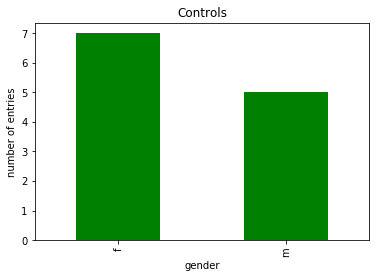

In [170]:
df1['Sex'].value_counts().plot.bar(color='green'); 
plt.title('Controls')
plt.xlabel('gender')
plt.ylabel('number of entries');

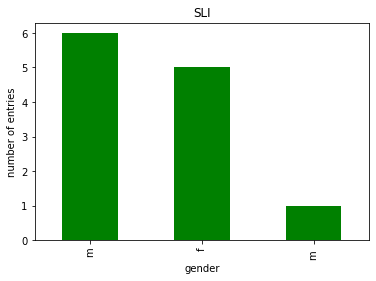

In [171]:
df2['Sex'].value_counts().plot.bar(color='green'); 
plt.title('SLI')
plt.xlabel('gender')
plt.ylabel('number of entries');

Here we can each group has different numbers boys and girls in it and in each group the difference equals 2, which is not bad but, considering that our data is very small it would be better to equalise the number of boys and girls in each group. (we also can see that, for some reason, one m in SLI group was identified as a separate category. The reason for that is a complete mystery for me)

Now, let's visualize and see if we have equal amount of healthy and clinical participants, using pie chart.

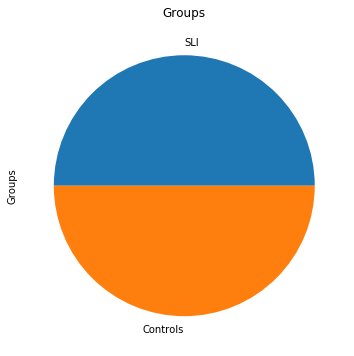

In [176]:
plt.figure(figsize=(6, 6))
merged['Groups'].value_counts().plot(kind='pie');
plt.title('Groups');

Here our ratio is 50/50, which is very important for the more accurate results of the analysis.

Second, we will see the differences between two groups, using the box plot.

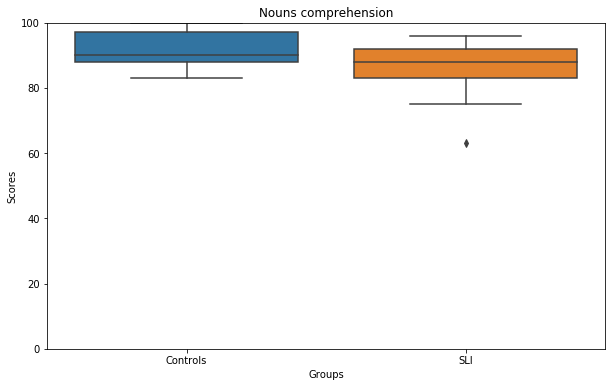

In [163]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Groups", y="NC", data=merged)
plt.ylim((0, 100))
plt.title('Nouns comprehension')
plt.ylabel('Scores')
plt.xlabel('Groups');

We can see that overall scores of children of our clinical group is lower that our healthy group, their average is also lower. We also can see the highest and the lowest results of both groups and they are also representative. On this barplot we can also see an outlier participant, who's score is significantly different from the other participant in SLI group.

Unfortunately, this particular table does not have any verbal information for the visualization with words, so I use a barplot type once more.
Let's visualize and see what age groups we have and how many participants of each age group is there (on a whole for both groups). 

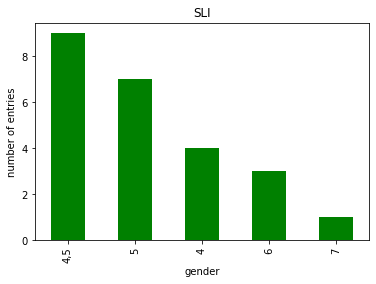

In [177]:
merged['Age'].value_counts().plot.bar(color='green'); 
plt.title('SLI')
plt.xlabel('gender')
plt.ylabel('number of entries');

As we can see, each age group is represented completely different. 4,5 y.o. kids and much more numerous than 6 y.o. and there is only one 7 y.o., which is a very bad thing, since that would really influence the cumulative analysis, while comparing two groups. 

**Final project**

Unfortunately, I still have absolutely zero idea about what I want to do for the final project (lack of imagination definitely does not help me here). I also do not quite know what would be enough to do for the final project, so I will reach you soon to discuss that matter. 